In [57]:
#importing the required library
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import datetime
import random
from nltk import tokenize
from operator import itemgetter
import math
import nltk
import tensorflow.compat.v1 as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install geopandas
!pip install descartes
import geopandas as gpd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
#Creating transformation functions for Data Pre-Processing
def transform1(ls):
    ls1 = []
    for i in ls:
        if i[0]!="event_id":
            if i[0]=='nan' and i[1]=='nan':
                continue
            else:
                ls1.append(i)
    ls2 = transform2(ls1)
    return ls2

def transform2(ls1):
    i=0
    ls2 = []
    while i < len(ls1):
        if ls1[i][0]!='nan':
            nw = ls1[i]
            i+=2
            signal = []
            disconnect = []
            while ls1[i][0]=='nan':
                signal.append(ls1[i][1])
                disconnect.append(ls1[i][2])
                i+=1
                if(i==len(ls1)):
                    break
            nw.append(signal)
            nw.append(disconnect)
            ls2.append(nw)
        else:
            i+=1    
    return ls2 

In [59]:
combined = []
for i in range(1,4):
  df1 = pd.read_excel("/content/Crime Prediction.xlsx", header=0,sheet_name=str(i))
  df = df1.iloc[:,0:16]
  df = df.replace(np.nan,'nan', regex=True)
  ls = df.values.tolist()
  ls1 = transform1(ls)
  for item in ls1:
    combined.append(item)
print("No. of rows after cleaning data: ",len(combined))

No. of rows after cleaning data:  801


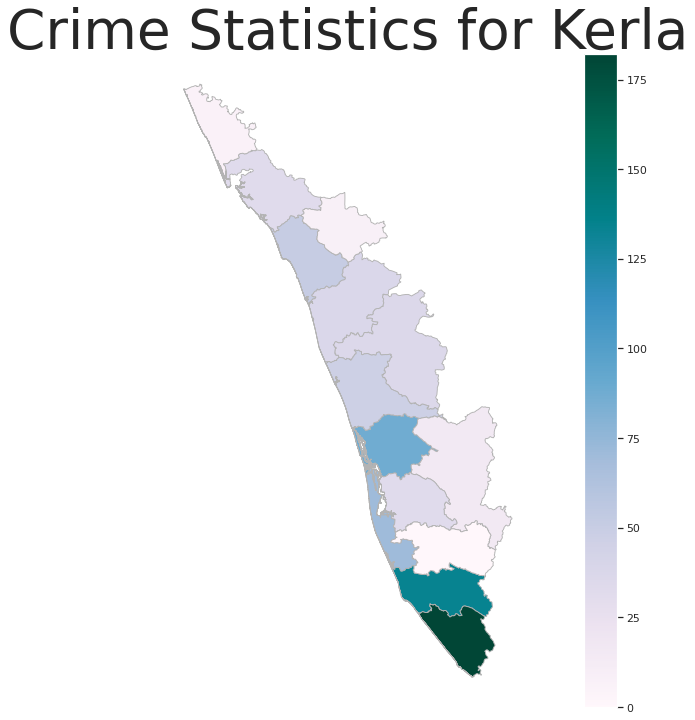

In [60]:
  #visulising the crime statistics 
  count = {}
  for i in combined:
    if i[4] not in count:
      count[i[4]] = 1
    else:
      count[i[4]] +=1
  ls = []
  for i in count.keys():
    if(i=="nan"):
      continue
    temp = []
    temp.append(i)
    temp.append(count[i])
    ls.append(temp)
  district_wise=pd.DataFrame(ls)
  fp = "/content/drive/MyDrive/IND_adm/IND_adm2.shp"
  map_df = gpd.read_file(fp)
  map_df = map_df[['NAME_1', 'NAME_2', 'geometry']]
  map_df = map_df[map_df['NAME_1']=='Kerala']
  merged = map_df.set_index('NAME_2').join(district_wise.set_index(0))
  merged[1].fillna(0, inplace=True)
  fig, ax = plt.subplots(1, figsize=(20, 12))
  ax.axis('off')
  ax.set_title('Crime Statistics for Kerla', fontdict={'fontsize': '55', 'fontweight' : '5'})
  # plot the figure
  merged.plot(column=1, cmap='PuBuGn', linewidth=0.9, ax=ax, edgecolor='0.7',legend=True)

In [61]:
def parse_time(text):
  sep = '.'
  stripped = text.split(sep, 1)[0]
  return stripped

def convert_time(date_time1,date_time2):
  string1 = parse_time(date_time1)
  string2 = parse_time(date_time2)
  format = "%Y-%m-%d %H:%M:%S"
  datetime_str1 = datetime.datetime.strptime(string1, format)
  datetime_str2 = datetime.datetime.strptime(string2, format)
  time = str(datetime_str2 - datetime_str1)
  return sum(x * int(t) for x, t in zip([60, 1, 1/60], time.split(":")))

In [62]:
#visulizing event timing
import time
import datetime
import calendar

A = "1998-04-18 16:48:36.76,0,38"
B = "1998-04-18 16:48:37,5,33"

# Runing the Code for B

data_pre = B.strip().split(',')
#print data_pre

stDate = data_pre[0].replace("\"", "")
print ("stDate before: ", stDate  )

### Addition of Addition of .0
# Here, we try to convert to datetime format using the format
# '%Y-%m-%d %H:%M:%S.%f'
try:
    dat_time = datetime.datetime.strptime(stDate,
                               '%Y-%m-%d %H:%M:%S.%f')

# If that doesn't work, we add ".4" to the end of stDate
# (we can change this to ".0")
# We then retry to convert stDate into datetime format                                   
except:
    stDate = stDate + ".4"
    dat_time = datetime.datetime.strptime(stDate,
                               '%Y-%m-%d %H:%M:%S.%f')
    #print "stDate after: ", stDate

###                                
print ("dat_time: ", dat_time)

mic_sec = dat_time.microsecond
#print "mic_sec: ", mic_sec

timcon = calendar.timegm(dat_time.timetuple())*1000000 + mic_sec
#print "timecon: ", timcon

strDate = "\"" + stDate + "\""
print ("strDate: ", strDate )

stDate before:  1998-04-18 16:48:37
dat_time:  1998-04-18 16:48:37.400000
strDate:  "1998-04-18 16:48:37.4"


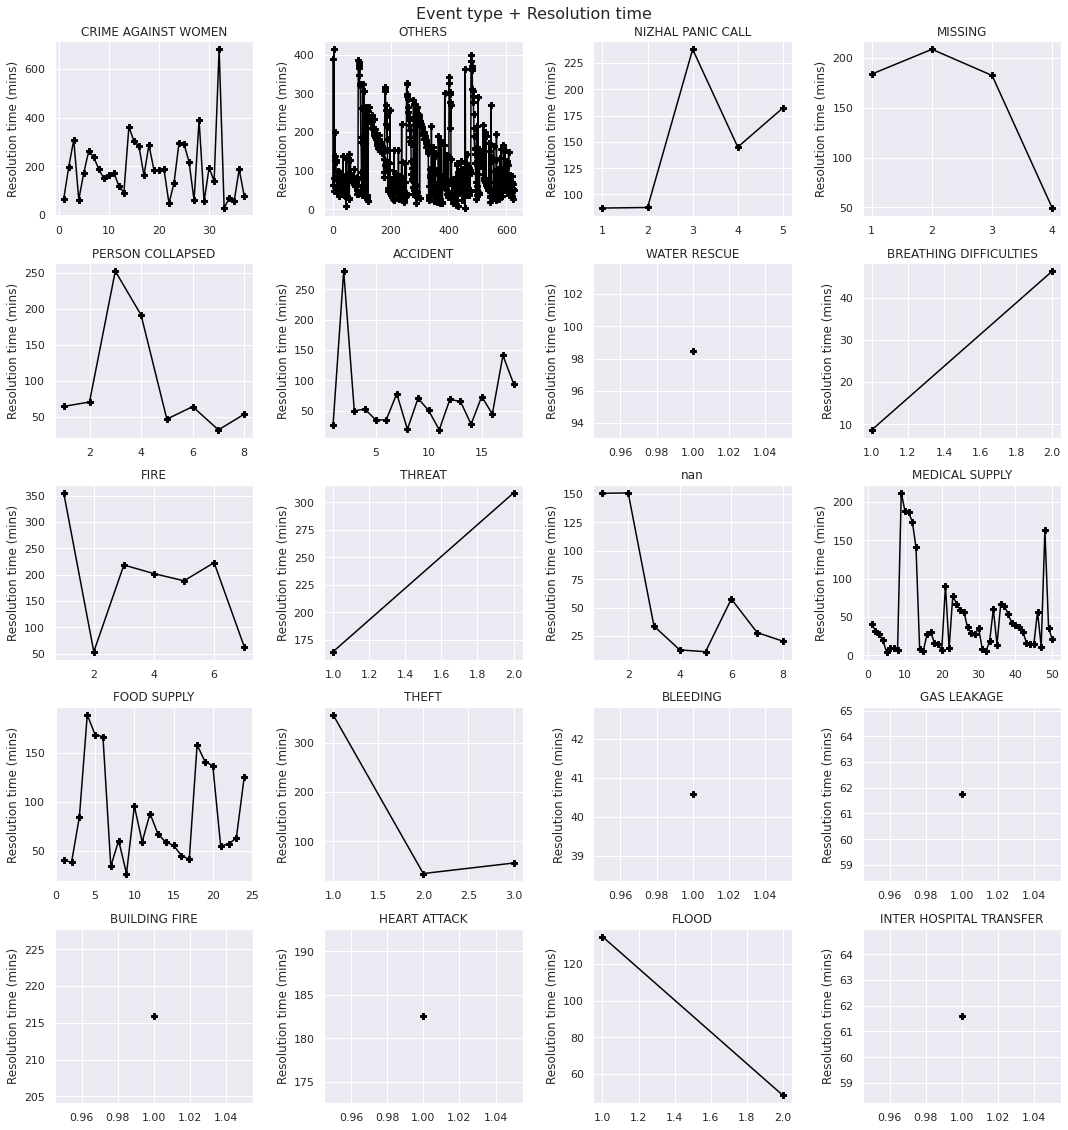

In [63]:
#Plotting Event type + their Resolution time
dic = {}
for i in combined:
  if(i[2] in dic.keys()):
    dic[i[2]].append(convert_time(i[1],i[11]))
  else:
    dic[i[2]] = [convert_time(i[1],i[11])]
fig = plt.figure(figsize=(15, 16))
fig.suptitle('Event type + Resolution time',fontsize=16)
fig.subplots_adjust(hspace = .4, wspace=.002)
for key,it in zip(dic,range(1,21)):
  index = []
  for i in range(1,len(dic[key])+1):
    index.append(i)

  ax = fig.add_subplot(5,4,it)
  ax.plot(index,dic[key], color='black',marker='P')
  ax.set_title(key)
  ax.set_ylabel('Resolution time (mins)')
  ax.grid(True)
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

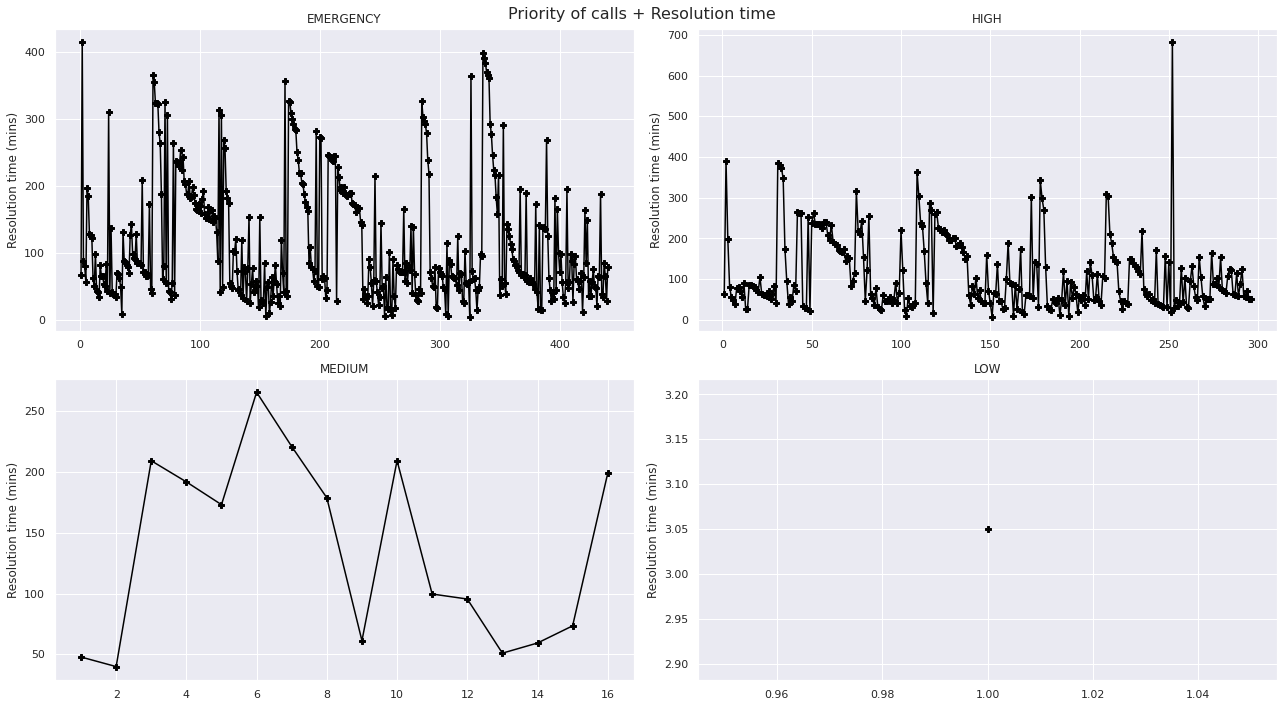

In [64]:
#Plotting Priority of calls + their Resolution time
dic = {}
for i in combined:
  if i[3]=='nan':
    continue
  if(i[3] in dic.keys()):
    dic[i[3]].append(convert_time(i[1],i[11]))
  else:
    dic[i[3]] = [convert_time(i[1],i[11])]

fig = plt.figure(figsize=(18, 10))
fig.suptitle('Priority of calls + Resolution time',fontsize=16)
fig.subplots_adjust(hspace = .4, wspace=.002)
for key,it in zip(dic,range(1,5)):
  index = []
  for i in range(1,len(dic[key])+1):
    index.append(i)
  ax = fig.add_subplot(2,2,it)
  ax.plot(index,dic[key], color='black',marker='P')
  ax.set_title(key)
  ax.set_ylabel('Resolution time (mins)')
  ax.grid(True)
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

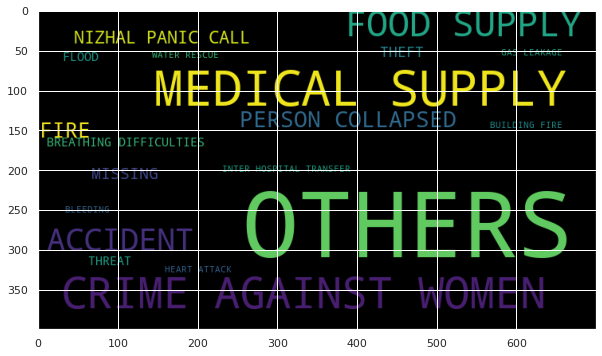

In [65]:
#Creating WordCloud for Crime Reported
ls = []
for i in combined:
  if i[2]=="nan":
    continue
  ls.append(i[2])
word_could_dict=Counter(ls)
wordcloud = WordCloud(width = 700, height = 400).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("on")
plt.show()

In [66]:
#Using Natural Languate ToolKit to find Top Keywords based on caller comments
string = ""
for i in combined:
  if(i[2]=="OTHERS"):
    string += str(i[15])
string = string.strip('\n')
stops = ["caller","informed","callers","PS",'ps','loc:','PS,','!','@','#','$','%','^','&','*','-','_',':',";",',','.','loc;','SAYS','IN','fish']
stop_words = set(stopwords.words('english'))
for i in stops:
  stop_words.add(i)
total_words = string.split()
total_word_length = len(total_words)
total_sentences = tokenize.sent_tokenize(string)
total_sent_len = len(total_sentences)
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

keywords = get_top_n(tf_idf_score,5)
print("Top Keywords are:")
for key in keywords.keys():
  print(key)

Top Keywords are:
gathered
near
people
gathering
shop


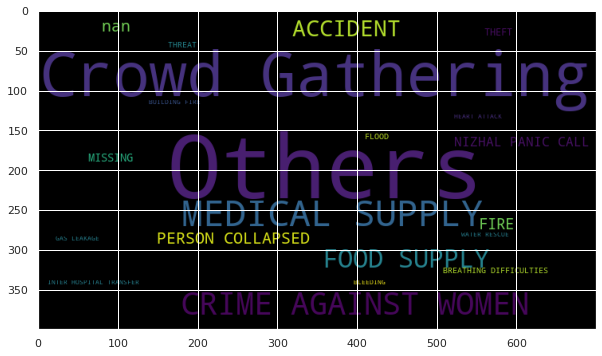

In [67]:
#New Word Cloud based on NLTK results
ls = []
for i in combined:
  if(i[2]=="OTHERS"):
    string = str(i[15])
    string = string.lower()
    if("gather" in string or "crowd" in string):
        ls.append("Crowd Gathering")
    else:
        ls.append("Others")
  else:
    ls.append(i[2])
word_could_dict=Counter(ls)
wordcloud = WordCloud(width = 700, height = 400).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("on")
plt.show()

In [68]:
#Using Logistic Regression for Classification
reg = pd.DataFrame(lis)
ord_enc = OrdinalEncoder()
reg["time"] = ord_enc.fit_transform(reg[[0]])
reg["district"] = ord_enc.fit_transform(reg[[1]])
reg["crime"] = ord_enc.fit_transform(reg[[2]])

x = reg.iloc[:, [3, 4]].values 
y = reg.iloc[:, 5].values

xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.20, random_state = 0)
 
classifier1 = LogisticRegression(random_state = 0,solver='newton-cg',max_iter=20000000)
classifier1.fit(xtrain, ytrain)
y_pred = classifier1.predict(xtest)

print ("Accuracy using newton-cg solver: ",accuracy_score(ytest, y_pred))

classifier2 = LogisticRegression(random_state = 0,solver='liblinear',max_iter=20000000)
classifier2.fit(xtrain, ytrain)
y_pred = classifier2.predict(xtest)

print ("Accuracy using liblinear solver: ",accuracy_score(ytest, y_pred))

Accuracy using newton-cg solver:  0.41509433962264153
Accuracy using liblinear solver:  0.4025157232704403


In [69]:
#Splitting data in train and test set
x = reg.iloc[:, [3, 4]].values 
y = reg.iloc[:, 5].values
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.20, random_state = 0)

In [70]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
import sklearn.metrics as metrics
clf = DecisionTreeClassifier()
# Predicting accuracy using desicion tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# Train Decision Tree Classifer
clf = clf.fit(xtrain,ytrain)

#Predicting the response for test dataset
y_pred = clf.predict(xtest)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.4528301886792453


In [71]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
import sklearn.metrics as metrics
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(xtrain,ytrain)

#Predict the response for test dataset
y_pred = clf.predict(xtest)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.5345911949685535


In [72]:
#Accuracy prediction Using K-Nearest neighbor
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
y_pred = classifier.predict(xtest)

In [75]:
#creating confusion matrix and predicting accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[ 0  0  0  1  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  3  0  0]
 [ 0  0  0 44  0  0  2  0 14  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  1  0  1  1  0  2  0  0]
 [ 0  0  0  2  0  0  3  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  1 34  0  0  2  0 32  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         8
         5.0       0.49      0.73      0.59        60
         6.0       0.00      0.00      0.00         1
         8.0       1.00      0.20      0.33         5
        12.0       0.38      0.38      0.38         8
        13.0       0.00      0.00      0.00         1
        15.0       0.54      0.46      0.50        69
        16.0       0.00      0.00      0.00         2
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

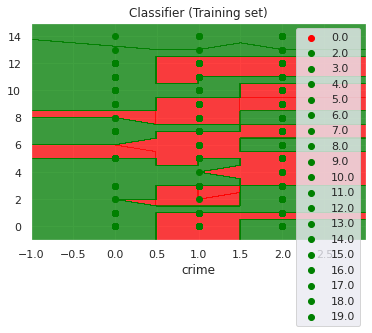

In [76]:
# Visualising the Training set results in K-NN
from matplotlib.colors import ListedColormap
X_set, y_set = xtrain, ytrain
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('crime')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

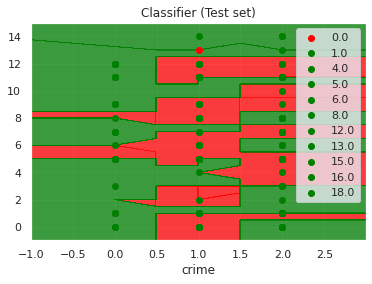

In [77]:
# Visualising the Training set results in K-NN
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('crime')
plt.legend()
plt.show()

In [78]:
#prediction using Support vector machine(SVM)
svclassifier = SVC(kernel='poly')
svclassifier.fit(xtrain, ytrain)
y_pred = svclassifier.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00        60
         6.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         5
        12.0       0.75      0.38      0.50         8
        13.0       0.00      0.00      0.00         1
        15.0       0.45      1.00      0.62        69
        16.0       0.00      0.00      0.00         2
        18.0       0.00      0.00      0.00         1

    accuracy                           0.45       159
   macro avg       0.11      0.12      0.10       159
weighted avg       0.23      0.45      0.29       159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#Using Deep Learning for Classification
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [80]:
x = reg.iloc[:, [3, 4]].values 
y = reg.iloc[:, 5].values
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.22, random_state = 0)

In [81]:
batch_size = 20
epochs = 20
num_classes = 10
crime_model = Sequential()
crime_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
crime_model.add(LeakyReLU(alpha=0.1))
crime_model.add(MaxPooling2D((2, 2),padding='same'))
crime_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
crime_model.add(LeakyReLU(alpha=0.1))
crime_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
crime_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
crime_model.add(LeakyReLU(alpha=0.1))                  
crime_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
crime_model.add(Flatten())
crime_model.add(Dense(128, activation='linear'))
crime_model.add(LeakyReLU(alpha=0.1))                  
crime_model.add(Dense(num_classes, activation='softmax'))
crime_model = Sequential()
crime_model.add(Dense(10, input_dim=xtrain.shape[1], activation='relu', kernel_initializer='he_normal'))
crime_model.add(Dense(1, activation='sigmoid'))
crime_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
crime_model.fit(xtrain, ytrain, epochs=100, batch_size=batch_size , verbose=3)
_, accuracy = crime_model.evaluate(xtest, ytest, verbose=0)
print('Accuracy: %.2f using Deep Learning' % (accuracy*100))

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [82]:
crime_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
crime_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
